<h2><center><font color="black"><strong>Model for flats in Paris</strong></font></center></h2>

In [208]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

pd.set_option('display.max_columns', None)
pd.options.mode.chained_assignment = None

In [2]:
    # Models
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor

    # Pipeline & Preprocess
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MaxAbsScaler, StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split, GridSearchCV

    # Scores
from sklearn.metrics import balanced_accuracy_score, make_scorer, f1_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_absolute_error , r2_score
from sklearn.metrics import mean_absolute_percentage_error

#### Import de la base

In [274]:
#df_Paris = pd.read_csv('../Data/update_data/df_Paris_Processed_Louise.csv', low_memory = False, encoding = 'latin1')
df = pd.read_csv('../Data/df_Paris_appartement.csv', low_memory = False, encoding = 'latin1')

In [275]:
max_prix = np.quantile(df.Prix_m2, 0.9999)
min_prix = np.quantile(df.Prix_m2, 0.001)

df = df[(df.Prix_m2 < max_prix)
                        & (df.Prix_m2 > min_prix)
                        & (df.code_type_local == 2)]

**Run helpers**

In [276]:
%run '../Helpers/Data_Process.py'

In [277]:
%run '../Helpers/Models.py'

In [293]:
%run '../Helpers/Data_visualisation.py'

#### Visualisation de la base

In [278]:
df.head(4)

,id_mutation,date_mutation,code_type_local,code_commune,surface_terrain,surface_reelle_bati,nombre_pieces_principales,nature_culture,valeur_fonciere,latitude,longitude,nombre_lots,numero_disposition,code_departement,Nombre_unite,Nombre_dependance,Year,num_trimestre,quarter,geometry,index_right,epci_name,iris_code,iris_name,iris_name_l,Prix_m2,Month,Pris_m2_moy_iris,std,Vente_par_iris,Vente_par_iris_tri,N_logements,N_res_ppale,N_res_second,N_vacant,N_maisons,N_apparts,N_proprietaire,N_locataire,DISP_MED19,Ec_maternelle,Ec_elementaire,UU2020,COM,TRIRIS,GRD_QUART,TYP_IRIS,P19_POP1564,P19_POP1524,P19_POP2554,P19_POP5564,P19_ACT1564,P19_CHOM1564,P19_INACT1564,Part_dactifs,Part_chomeurs,Arrondissement,dist_metro
0,2017-731653,2017-07-04,2.0,75103,0.0,42.0,3.0,0,571110.0,48.858043,2.366404,2,1,75,1,0,2017,3,2017_Q3,POINT (2.366404 48.858043),17739.0,['MÃÂ©tropole du Grand Paris'],751031102,Les Archives,les archives 2,13597.857143,7,11917.531985,4187.643956,145,11,1229.0,962.0,193.0,74.0,0.0,1226.0,328.0,598.0,41090,0,1,851,75103,750081,7510311,H,1151.465277,168.611918,792.332141,190.521218,948.557229,80.312175,202.908048,0.823783,0.069748,75103,0.001604
1,2017-731668,2017-07-07,2.0,75103,0.0,88.0,3.0,0,1414600.0,48.857626,2.364992,2,1,75,1,1,2017,3,2017_Q3,POINT (2.364992 48.857626),17739.0,['MÃÂ©tropole du Grand Paris'],751031102,Les Archives,les archives 2,16075.000000,7,11917.531985,4187.643956,145,11,1229.0,962.0,193.0,74.0,0.0,1226.0,328.0,598.0,41090,0,1,851,75103,750081,7510311,H,1151.465277,168.611918,792.332141,190.521218,948.557229,80.312175,202.908048,0.823783,0.069748,75103,0.002943
2,2017-731783,2017-07-19,2.0,75103,0.0,17.0,1.0,0,215000.0,48.856136,2.366991,1,1,75,1,0,2017,3,2017_Q3,POINT (2.366991 48.856136),17739.0,['MÃÂ©tropole du Grand Paris'],751031102,Les Archives,les archives 2,12647.058824,7,11917.531985,4187.643956,145,11,1229.0,962.0,193.0,74.0,0.0,1226.0,328.0,598.0,41090,0,1,851,75103,750081,7510311,H,1151.465277,168.611918,792.332141,190.521218,948.557229,80.312175,202.908048,0.823783,0.069748,75103,0.001712
3,2017-731808,2017-07-27,2.0,75103,0.0,72.0,3.0,0,598000.0,48.857626,2.364992,1,1,75,1,0,2017,3,2017_Q3,POINT (2.364992 48.857626),17739.0,['MÃÂ©tropole du Grand Paris'],751031102,Les Archives,les archives 2,8305.555556,7,11917.531985,4187.643956,145,11,1229.0,962.0,193.0,74.0,0.0,1226.0,328.0,598.0,41090,0,1,851,75103,750081,7510311,H,1151.465277,168.611918,792.332141,190.521218,948.557229,80.312175,202.908048,0.823783,0.069748,75103,0.002943


In [279]:
dummies_pr_var_continues(df, 'dist_metro', 0.01)
dummies_pr_var_continues(df, 'Nombre_dependance', 0)
dummies_pr_var_continues(df, 'Ec_maternelle', 0)
dummies_pr_var_continues(df, 'Ec_elementaire', 0)

## Split temporel : 

In [280]:
df_train = df[df['date_mutation'] < '2021-04-01']
df_test = df[df['date_mutation'] >= '2021-04-01']

In [281]:
df_train = pd.concat([df_train, pd.get_dummies(df_train[['quarter']])], axis = 1)

In [282]:
df_train['n_pieces_BienStandard'] = df_train['nombre_pieces_principales']-2
df_train['n_dependances_BienStandard'] = df_train['Nombre_dependance']

## Indice de prix : 

In [284]:
features_ols = ['quarter_2017_Q4', 'quarter_2018_Q1', 'quarter_2018_Q2', 'quarter_2018_Q3',
'quarter_2018_Q4', 'quarter_2019_Q1', 'quarter_2019_Q2',
'quarter_2019_Q3', 'quarter_2019_Q4', 'quarter_2020_Q1',
'quarter_2020_Q2', 'quarter_2020_Q3', 'quarter_2020_Q4',
'quarter_2021_Q1',
'n_pieces_BienStandard', 'n_dependances_BienStandard']
outcome = 'Prix_m2'

In [285]:
model = model_OLS_prix(df_train, 'Prix_m2', features_ols, summary = True)

                            OLS Regression Results                            
Dep. Variable:                Prix_m2   R-squared:                       0.107
Model:                            OLS   Adj. R-squared:                  0.107
Method:                 Least Squares   F-statistic:                     584.9
Date:                Sun, 26 Mar 2023   Prob (F-statistic):               0.00
Time:                        14:26:03   Log-Likelihood:            -7.0949e+05
No. Observations:               78326   AIC:                         1.419e+06
Df Residuals:                   78309   BIC:                         1.419e+06
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const               

In [288]:
df_train = add_indice_prix(df_train, indice_prix_quarter(model, plot = False))

## Visualisation

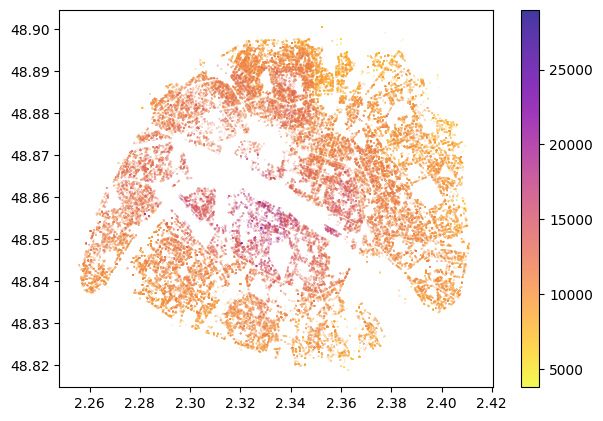

In [294]:
visualise(df, 'Prix_m2')

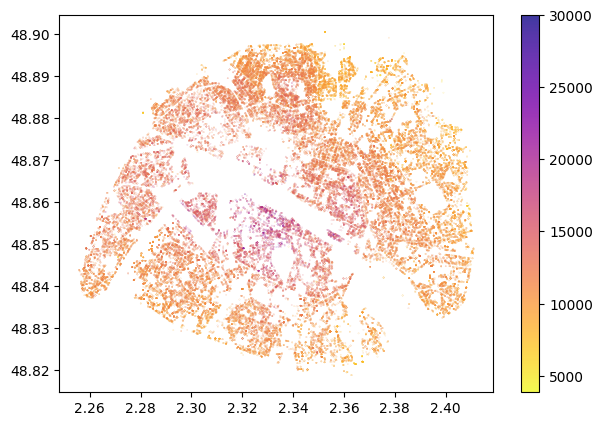

In [296]:
visualise(df_train, 'Prix_m2_actualise_Q1_2021')

## <center> K plus proches voisins sur la latitude/longitude

Les features sont : 
- pour le KNN : 
    - latitude; longitude
- pour le Random Forest ou GBoost:
    - à compléter

In [311]:
    # Dependant variables : cooridnates
features_knn = ['latitude', 'longitude']
    # Output
label_train = 'Prix_m2_actualise_Q1_2021'
label_test = 'Prix_m2'

In [313]:
knn_pipe = model_KNN_coordinates(df_train, df_test, features_knn,
                          label_train, label_test,
                          MinMaxScaler(), 'uniform', 25, 5)

Returned hyperparameter: {'Knn__n_neighbors': 13}


In [314]:
    # Scores on TRAIN dataset
compute_scores(knn_pipe, df_train[features_knn], df_train[label_train])

MAPE:  10.07643752298031
MDAPE:  7.545547808252347


In [315]:
    # Scores on TEST dataset
compute_scores(knn_pipe, df_test[features_knn], df_test[label_test])

MAPE:  10.447990116665167
MDAPE:  7.984715735937642


## Etude du score

In [323]:
X_test = df_test.copy()
y_pred = knn_pipe.predict(X_test[features_knn])
X_test["y_pred"] = y_pred
X_test['y_true'] = df_test[label_test]
X_test['mdape'] = np.abs((X_test['y_true'] - X_test["y_pred"])/X_test['y_true'])*100
X_test.head(3)

,id_mutation,date_mutation,code_type_local,code_commune,surface_terrain,surface_reelle_bati,nombre_pieces_principales,nature_culture,valeur_fonciere,latitude,longitude,nombre_lots,numero_disposition,code_departement,Nombre_unite,Nombre_dependance,Year,num_trimestre,quarter,geometry,index_right,epci_name,iris_code,iris_name,iris_name_l,Prix_m2,Month,Pris_m2_moy_iris,std,Vente_par_iris,Vente_par_iris_tri,N_logements,N_res_ppale,N_res_second,N_vacant,N_maisons,N_apparts,N_proprietaire,N_locataire,DISP_MED19,Ec_maternelle,Ec_elementaire,UU2020,COM,TRIRIS,GRD_QUART,TYP_IRIS,P19_POP1564,P19_POP1524,P19_POP2554,P19_POP5564,P19_ACT1564,P19_CHOM1564,P19_INACT1564,Part_dactifs,Part_chomeurs,Arrondissement,dist_metro,dist_metro_dummy,Nombre_dependance_dummy,Ec_maternelle_dummy,Ec_elementaire_dummy,y_pred,y_true,mdape
101,2021-1581950,2021-04-01,2.0,75103,0.0,44.0,3.0,0,710000.0,48.857902,2.366992,3,1,75,1,0,2021,2,2021_Q2,POINT (2.366992 48.857902),17739.0,['MÃÂ©tropole du Grand Paris'],751031102,Les Archives,les archives 2,16136.363636,4,11475.289813,6700.767551,145,8,1229.0,962.0,193.0,74.0,0.0,1226.0,328.0,598.0,41090,0,1,851,75103,750081,7510311,H,1151.465277,168.611918,792.332141,190.521218,948.557229,80.312175,202.908048,0.823783,0.069748,75103,0.001001,0,0,0,1,13104.804945,16136.363636,18.787124
102,2021-1582387,2021-04-09,2.0,75103,0.0,45.0,2.0,0,573000.0,48.857871,2.364699,2,1,75,1,0,2021,2,2021_Q2,POINT (2.364699 48.857871),17739.0,['MÃÂ©tropole du Grand Paris'],751031102,Les Archives,les archives 2,12733.333333,4,11475.289813,6700.767551,145,8,1229.0,962.0,193.0,74.0,0.0,1226.0,328.0,598.0,41090,0,1,851,75103,750081,7510311,H,1151.465277,168.611918,792.332141,190.521218,948.557229,80.312175,202.908048,0.823783,0.069748,75103,0.003250,0,0,0,1,14569.619697,12733.333333,14.421097
103,2021-1582391,2021-04-14,2.0,75103,0.0,26.0,2.0,0,377505.0,48.856715,2.367546,2,1,75,1,0,2021,2,2021_Q2,POINT (2.367546 48.856715),17739.0,['MÃÂ©tropole du Grand Paris'],751031102,Les Archives,les archives 2,14519.423077,4,11475.289813,6700.767551,145,8,1229.0,962.0,193.0,74.0,0.0,1226.0,328.0,598.0,41090,0,1,851,75103,750081,7510311,H,1151.465277,168.611918,792.332141,190.521218,948.557229,80.312175,202.908048,0.823783,0.069748,75103,0.000934,0,0,0,1,12166.773732,14519.423077,16.203463


In [330]:
X_test.groupby('Arrondissement').agg({'mdape' : 'median'}).reset_index().set_index('Arrondissement').T

Arrondissement,75101,75102,75103,75104,75105,75106,75107,75108,75109,75110,75111,75112,75113,75114,75115,75116,75117,75118,75119,75120
mdape,11.064216,9.007546,9.241943,9.211942,8.395176,10.273309,10.144153,9.443174,8.136821,7.949931,7.283687,6.860808,7.363947,7.378233,7.159096,8.552781,7.715356,8.335,8.208512,7.761758


In [337]:
fig = px.scatter(X_test, x = 'surface_reelle_bati', y = 'mdape')
fig.update_layout(yaxis_range=[-0.5, 150])
fig.show()

## Random Forest

In [351]:
%run '../Helpers/Models.py'

In [352]:
features_RF = ['Nombre_dependance', 'dist_metro', 'Ec_elementaire_dummy', 'Ec_maternelle_dummy',
              'N_apparts', 'DISP_MED19', 'Part_chomeurs']

In [ ]:
RF_model = model_RF_post_KNN(df_test, df_train, features_RF, features_knn, label_train, label_test,
                      model_knn = knn_pipe, standardisation = StandardScaler(), range_depth = [5, 10], nb_cv = 5)

In [ ]:
RF_model.best_params_

In [ ]:
compute_scores(RF_model, X_test_rf, y_test)

## Gradient Boost

In [342]:
pipe = Pipeline([('scaler', StandardScaler()), ('GBoost', GradientBoostingRegressor())])
parameters = {'GBoost__n_estimators': [50, 100, 150]} # defining parameter space
gboost_pipe = GridSearchCV(pipe, parameters, cv=5)
gboost_pipe.fit(X_train_rf, y_train)

compute_scores(gboost_pipe, X_test_rf, y_test)

MAPE:  10.514570901291458
MDAPE:  7.969395479860783


In [343]:
gboost_pipe.best_params_

{'GBoost__n_estimators': 50}

In [344]:
#dummies_pr_var_continues(df, 'dist_metro', 0.01)

**Features importance**

RANDOM FOREST

In [219]:
features_RF = ['Nombre_dependance', 'dist_metro', 'Ec_elementaire_dummy', 'Ec_maternelle_dummy']

X_train_rf = df_train[features_RF]
X_train_rf['y_pred_knn'] = knn_pipe.predict(X_train_knn)
X_test_rf = df_test[features_RF]
X_test_rf['y_pred_knn'] = knn_pipe.predict(X_test_knn)

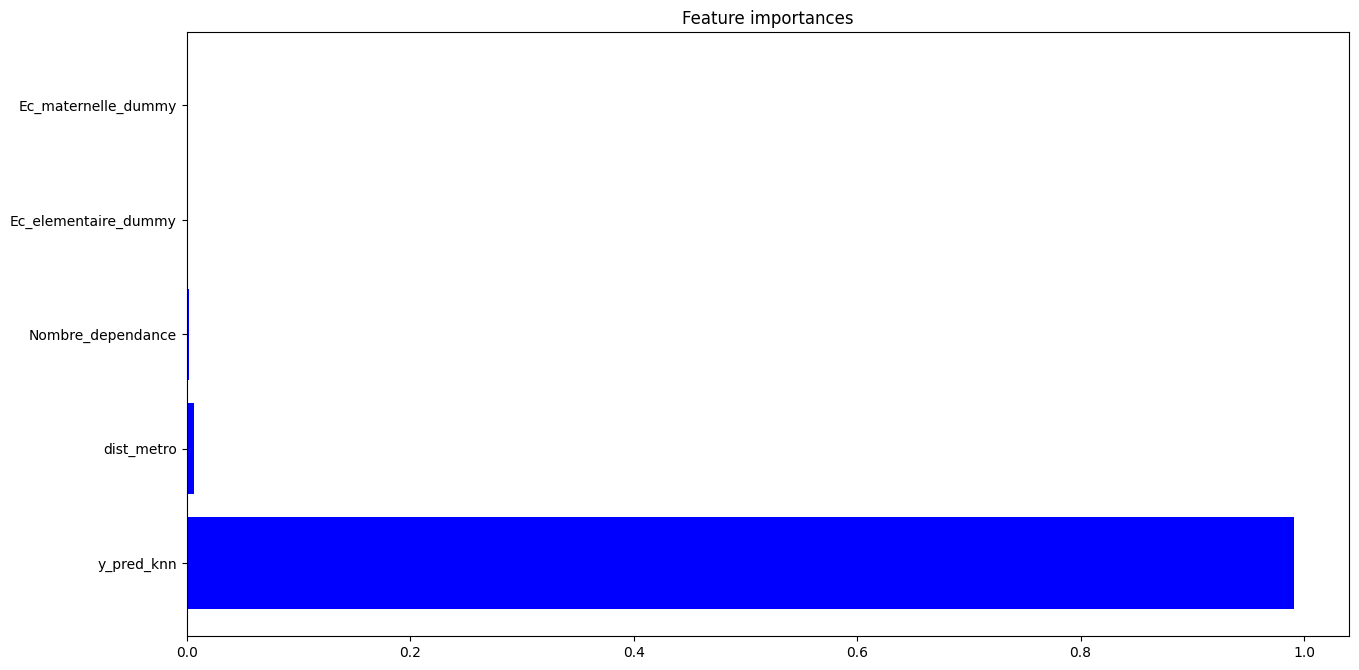

In [220]:
model_rf = RandomForestRegressor(max_depth=10)
model_rf.fit(X_train_rf, y_train)

#Prediciton 
y_pred_rf = model_rf.predict(X_test_rf)

importances = model_rf.feature_importances_
indices = np.argsort(importances)[::-1]
columns = X_train_rf.columns
# plot
nb_features = X_train_rf.shape[1]
plt.figure(figsize=(15, 8))
plt.title("Feature importances")
plt.barh(
    range(nb_features),
    importances[indices],
    color='b')
plt.yticks(range(nb_features), columns[indices], rotation='horizontal', size=10)
plt.show()

XG BOOST

In [186]:
df_train.columns

Index(['id_mutation', 'date_mutation', 'code_type_local', 'code_commune',
       'surface_terrain', 'surface_reelle_bati', 'nombre_pieces_principales',
       'nature_culture', 'valeur_fonciere', 'latitude', 'longitude',
       'nombre_lots', 'numero_disposition', 'code_departement', 'Nombre_unite',
       'Nombre_dependance', 'Year', 'num_trimestre', 'quarter', 'geometry',
       'index_right', 'epci_name', 'iris_code', 'iris_name', 'iris_name_l',
       'Prix_m2', 'Month', 'Pris_m2_moy_iris', 'std', 'Vente_par_iris',
       'Vente_par_iris_tri', 'N_logements', 'N_res_ppale', 'N_res_second',
       'N_vacant', 'N_maisons', 'N_apparts', 'N_proprietaire', 'N_locataire',
       'DISP_MED19', 'Ec_maternelle', 'Ec_elementaire', 'UU2020', 'COM',
       'TRIRIS', 'GRD_QUART', 'TYP_IRIS', 'P19_POP1564', 'P19_POP1524',
       'P19_POP2554', 'P19_POP5564', 'P19_ACT1564', 'P19_CHOM1564',
       'P19_INACT1564', 'Part_dactifs', 'Part_chomeurs', 'Arrondissement',
       'dist_metro', 'dist_metro_d

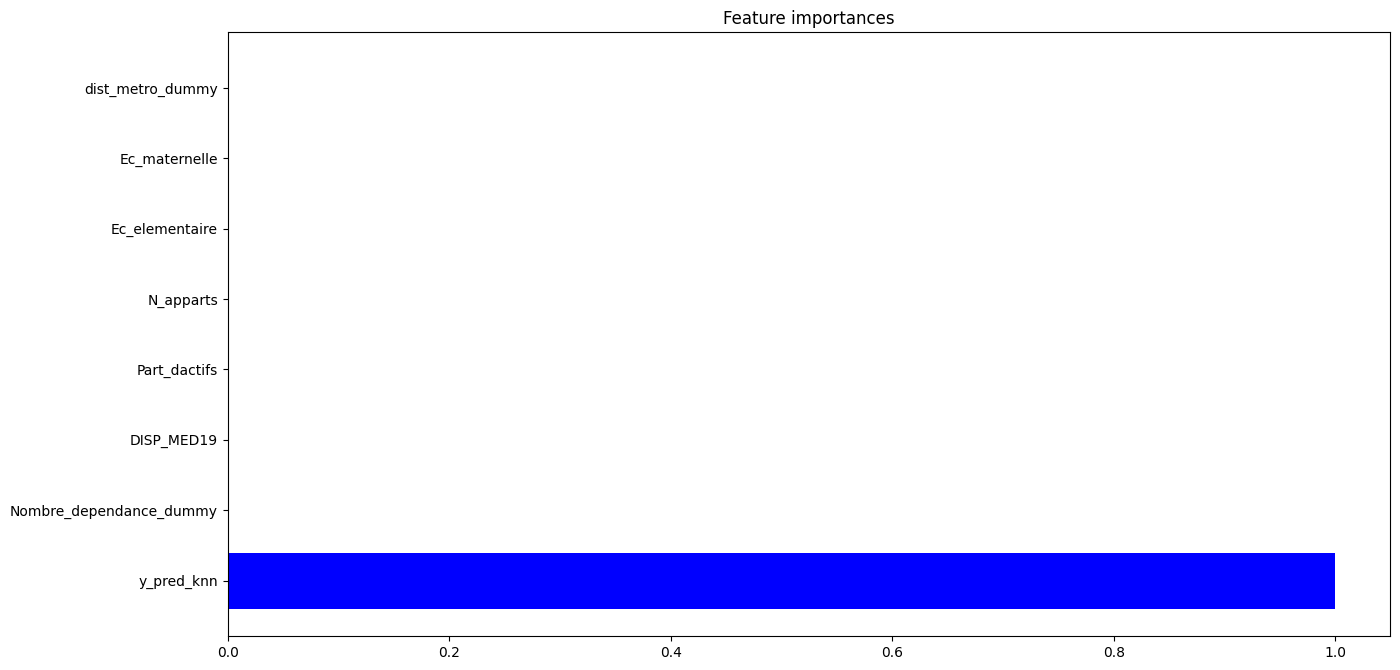

In [203]:
model_gb = GradientBoostingRegressor(n_estimators = 100)
model_gb.fit(X_train_rf, y_train)

#Prediciton 
y_pred_rf = model_gb.predict(X_test_rf)

importances = model_gb.feature_importances_
indices = np.argsort(importances)[::-1]
columns = X_train_rf.columns
# plot
nb_features = X_train_rf.shape[1]
plt.figure(figsize=(15, 8))
plt.title("Feature importances")
plt.barh(
    range(nb_features),
    importances[indices],
    color='b')
plt.yticks(range(nb_features), columns[indices], rotation='horizontal', size=10)
plt.show()